In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


In [2]:
df = pd.read_csv('/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv', parse_dates=['Date'])

# Understanding the data

In [3]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [4]:
df.shape

(26052, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      26052 non-null  int64         
 1   City       26052 non-null  object        
 2   Date       26052 non-null  datetime64[ns]
 3   Card Type  26052 non-null  object        
 4   Exp Type   26052 non-null  object        
 5   Gender     26052 non-null  object        
 6   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
df.nunique()

index        26052
City           986
Date           600
Card Type        4
Exp Type         6
Gender           2
Amount       24972
dtype: int64

In [7]:
print(f"Date ranges from {df.Date.dt.date.min()} to {df.Date.dt.date.max()}")

Date ranges from 2013-10-04 to 2015-05-26


---
# Data Cleaning

## 1. Missing value treatment

In [8]:
df.isna().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

## 2. Checking for duplicate rows

In [9]:
df.duplicated().sum()

0

*No missing values and no duplicate rows. Looks like the dataset is already cleaned.*

## 3. Dropping index column

In [10]:
df.drop('index', axis=1, inplace=True)

## 4. Reformatting City column

In [11]:
def city_name(x):
    return x.split(',')[0]

df.City = df.City.apply(city_name)

In [12]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,2014-10-29,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424
4,Bengaluru,2015-05-05,Gold,Bills,F,171574


---
# EDA

### Exploring data a bit more
1. How many cities are present in the dataset?
2. What are the different types of card types used by Indian?
3. What are the different types of expenditure? 
4. What is the overall gender distribution?
5. What was the minimum and maximum number of transactions recorded in the day?

### Analysing spending habits
6. Which year saw the maximum and the least number of trasactions?
7. Transactions by months for 2013, 2014, and 2015.
8. Most used type of card by gender.
9. What is the month wise transactions in 2014 for males and females?
10. In all years, what was the distribution of transactions by expense type by male and female. 


In [13]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,2014-10-29,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424
4,Bengaluru,2015-05-05,Gold,Bills,F,171574


## 1. What cities are present in datasets?

In [14]:
df.City.nunique()

986

## 2. What are the different types of card types used by Indian?

In [15]:
for _ in list(df['Card Type'].unique()):
    print(_)

Gold
Platinum
Silver
Signature


## 3. What are the different types of expenditure?

In [16]:
for _ in list(df['Exp Type'].unique()):
    print(_)

Bills
Food
Entertainment
Grocery
Fuel
Travel


## 4. What is the overall gender distribution?

In [17]:
import matplotlib.pyplot as plt

In [18]:
m_transactions = df['Amount'][df['Gender'] == 'M'].sum()
f_transactions = df['Amount'][df['Gender'] == 'F'].sum()

print(f'Total transactions by Females: {f_transactions:,}')
print(f'Total transactions by Males: {m_transactions:,}')

Total transactions by Females: 2,205,311,030
Total transactions by Males: 1,869,522,343


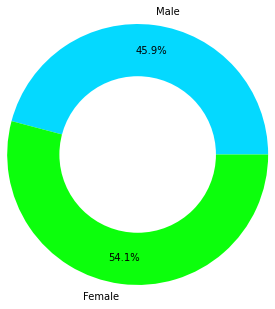

In [19]:
plt.pie([m_transactions, f_transactions], labels=['Male', 'Female'], colors=['xkcd:neon blue', 'xkcd:neon green'], radius=1.5, autopct='%1.1f%%', pctdistance=0.80)

centre_circle = plt.Circle((0, 0), 0.90, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()


## 5. What was the minimum and maximum number of transactions recorded in the day?

In [20]:
max_transaction = df[['Date', 'Amount']][df.Amount == df.Amount.max()]
min_transaction = df[['Date', 'Amount']][df.Amount == df.Amount.min()]

print(f"Maximum transactions recorded in a day was on {list(max_transaction['Date'].dt.strftime('%d-%m-%Y'))[0]} and was {df.Amount.max()}.")
print(f"While minimum was on {list(min_transaction['Date'].dt.strftime('%d-%m-%Y'))[0]} with just {df.Amount.min()} transactions.")


Maximum transactions recorded in a day was on 14-10-2014 and was 998077.
While minimum was on 02-05-2014 with just 1005 transactions.


## 6. Which year saw the maximum and the least number of transactions?


In [21]:
df['Year'] = df.Date.dt.year

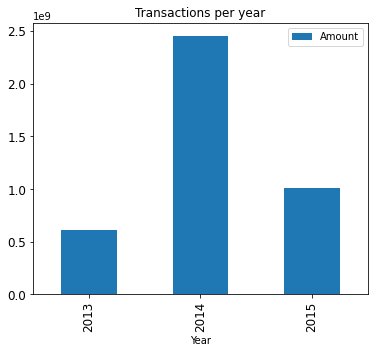

In [22]:
df.groupby('Year').sum().plot(kind='bar', figsize=(6, 5), fontsize=12, label='Amount')
plt.title("Transactions per year")
plt.show()

In [23]:
transactions_2013_count = df.Date.loc[(df.Date >= '2013-01-01') & (df.Date < '2014-01-01')].count()
months_2013_count = df.Date.dt.month_name().loc[(df.Date >= '2013-01-01') & (df.Date < '2014-01-01')].nunique()

print(f"Total transactions in 2013: {transactions_2013_count}")
print(f"Months count in 2013: {months_2013_count}")

Total transactions in 2013: 3927
Months count in 2013: 3


In [24]:
transactions_2014_count = df.Date.loc[(df.Date > '2013-12-31') & (df.Date < '2015-01-01')].count()
months_2014_count = df.Date.dt.month_name().loc[(df.Date > '2013-12-31') & (df.Date < '2015-01-01')].nunique()

print(f"Total transactions in 2014: {transactions_2014_count}")
print(f"Months count in 2014: {months_2014_count}")

Total transactions in 2014: 15791
Months count in 2014: 12


In [25]:
transactions_2015_count = df.Date.loc[(df.Date > '2014-12-31')].count()
months_2015_count = df.Date.dt.month_name().loc[(df.Date > '2014-12-31')].nunique()

print(f"Total transactions in 2015: {transactions_2015_count}")
print(f"Months count in 2015: {months_2015_count}")

Total transactions in 2015: 6334
Months count in 2015: 5


*Important thing to notice here - we don't have complete records for year 2013 and 2015.*

## 7. Most used type of card by gender.

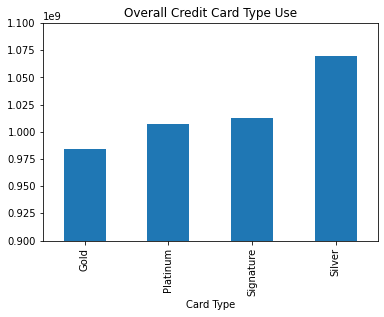

In [26]:
df.groupby(['Card Type']).sum()['Amount'].plot(kind='bar', ylim=(0.9e9, 1.1e9))
plt.title('Overall Credit Card Type Use')
plt.show()

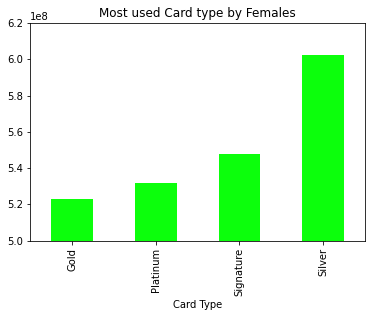

In [27]:
df[df.Gender == 'F'].groupby(['Card Type']).sum()['Amount'].plot(kind='bar',color='xkcd:neon green' , ylim=(5e8,6.2e8))

plt.title('Most used Card type by Females')
plt.show()

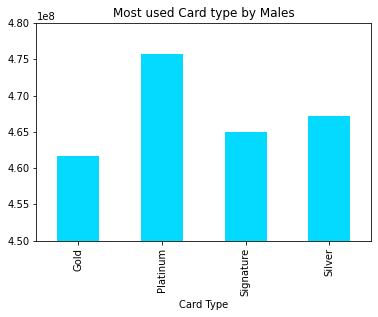

In [28]:
df[df.Gender == 'M'].groupby(['Card Type']).sum()['Amount'].plot(kind='bar', color='xkcd:neon blue', ylim=(4.5e8,4.8e8))

plt.title('Most used Card type by Males')
plt.show()

## 8. What is the month wise transactions in 2014 for males and females?

In [29]:
month_labels = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

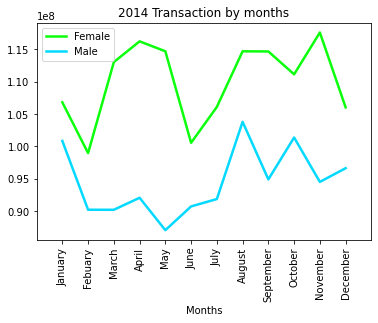

In [30]:
import warnings
warnings.filterwarnings('ignore')


df[df.Year == 2014][df.Gender == 'F'].groupby(df.Date.dt.month).sum().Amount.plot(color='xkcd:neon green', xlim=(0, 13), linewidth=2.5)
df[df.Year == 2014][df.Gender == 'M'].groupby(df.Date.dt.month).sum().Amount.plot(color='xkcd:neon blue', xlim=(0, 13), linewidth=2.5)
plt.xlabel('Months')
plt.xticks(range(1,13), labels=month_labels, rotation='vertical')
plt.title('2014 Transaction by months')
plt.legend(['Female', 'Male'])
plt.show()

## 9. In all years, what was the distribution of transactions by expense type by male and female. 

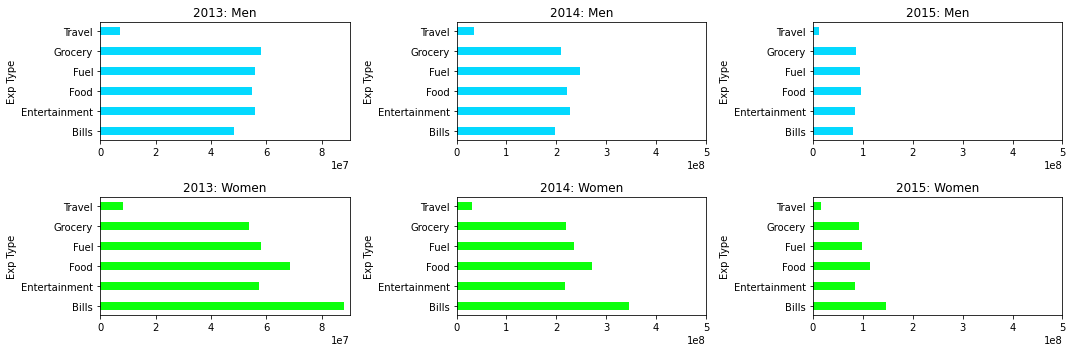

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))


df[df.Year == 2013][df.Gender == 'M'].groupby('Exp Type').sum().Amount.plot(kind='barh', ax=ax[0,0], color='xkcd:neon blue', width=0.4, title='2013: Men', xlim=(0,9e7))
df[df.Year == 2014][df.Gender == 'M'].groupby('Exp Type').sum().Amount.plot(kind='barh', ax=ax[0,1], color='xkcd:neon blue', width=0.4, title='2014: Men', xlim=(0,5e8))
df[df.Year == 2015][df.Gender == 'M'].groupby('Exp Type').sum().Amount.plot(kind='barh', ax=ax[0,2], color='xkcd:neon blue', width=0.4, title='2015: Men', xlim=(0,5e8))

df[df.Year == 2013][df.Gender == 'F'].groupby('Exp Type').sum().Amount.plot(kind='barh', ax=ax[1,0], color='xkcd:neon green', width=0.4, title='2013: Women',xlim=(0,9e7))
df[df.Year == 2014][df.Gender == 'F'].groupby('Exp Type').sum().Amount.plot(kind='barh', ax=ax[1,1], color='xkcd:neon green', width=0.4, title='2014: Women', xlim=(0,5e8))
df[df.Year == 2015][df.Gender == 'F'].groupby('Exp Type').sum().Amount.plot(kind='barh', ax=ax[1,2], color='xkcd:neon green', width=0.4, title='2015: Women', xlim=(0,5e8))

fig.tight_layout()

# Conclusions/Insights
- There are total of 986 cities of data.
- Platinum, Gold, Silver & Signature are 4 different types of credit cards used.
- Bills, Food, Entertainment, Grocery, Fuel, Travel are the types of expenses done.
- Most women used Silver credit card while Platinum card was used by maximum number of men.
- The overall credit card usage of Women were more than Men in 2014. (Female: 2,205,311,030; Men: 1,869,522,343)
- Maximum transactions recorded in a day was on 14-10-2014 and was 998077. While minimum was on 02-05-2014 with just 1005 transactions.
- February and June of 2014 saw the least number of female credit card users and months April and November saw the most.
- In the month of May same year, there were least number of male credit card users and in August the number was maximum. 
- Expense-wise, Women population has spend more overall. 
- Transactions on Travel expense were the least among all other types. Women spent most on bills and food. While in mens's spendings were pretty balanced in all 3 years.